In [1]:
%load_ext autoreload
%autoreload 2

import DataSets
from DataSets import *
import DataGeneration
from DataGeneration import *

import pandas as pd
import numpy as np
import sklearn 

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#np.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
seed = 2021
np.random.seed(seed)

x1, y1, attributes1, classes1, full1 = IrisDataSet()
x2, y2, attributes2, classes2, full2 = BostonHPDataSetAbsolut()
x3, y3, attributes3, classes3, full3 = BostonHPDataSetQuant()
x4, y4, attributes4, classes4, full4 = DiabetesDataSetAbsolut()
x5, y5, attributes5, classes5, full5 = DiabetesDataSetQuant()
x6, y6, attributes6, classes6, full6 = CaliforniaHLDataSetAbsolut()
x7, y7, attributes7, classes7, full7 = CaliforniaHLDataSetQuant()
x8, y8, attributes8, classes8, full8 = OccupancyDataSet()



[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


(120, 4)
(15, 4)
(15, 4)
{'activation': 'relu', 'alpha': 1e-05, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 20000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 2021, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
TrainScore: How good is the training data classified by the black box
0.9916666666666667
SimilarScore: How good is the similar data classified by the black box
1.0
TestScore: How good is the test data classified by the black box
0.9333333333333333
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_imp

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
TrainScore: How good is the training data classified by the black box
0.9914001937984496
SimilarScore: How good is the similar data classified by the black box
0.9016472868217055
TestScore: How good is the test data classified by the black box
0.8963178294573644
[0.86967054 0.89631783]
(16512, 8)
(2064, 8)
(2064, 8)
{'activation': 'relu', 'alpha': 1e-05, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max

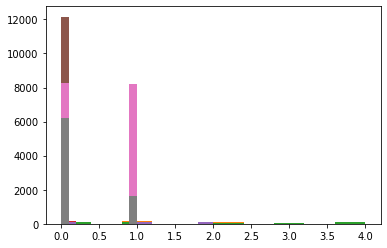

In [11]:
scores_a = np.zeros([8,2])


for i_datasets in range(0,8):
    x = globals()['x'+str(i_datasets+1)]
    y = globals()['y'+str(i_datasets+1)]
    attributes = globals()['attributes'+str(i_datasets+1)]
    classes = globals()['classes'+str(i_datasets+1)]
    full = globals()['full'+str(i_datasets+1)]



    np.random.seed(seed)
    x_train_bb, x_rest, y_train_bb, y_rest = train_test_split(x, y, test_size=0.2, random_state=seed)
    x_similar, x_test, y_similar, y_test = train_test_split(x_rest, y_rest, test_size=0.5, random_state=seed)

    print(x_train_bb.shape)
    print(x_similar.shape)
    print(x_test.shape)
    plt.hist(y_train_bb)
    #plt.hist(y_similar)
    #plt.hist(y_test)
    scores = np.zeros(2)

    NeuralBlackBox = MLPClassifier(solver='adam', alpha=1e-5,
                        hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=20000, random_state = seed, n_iter_no_change=100)

    NeuralBlackBox.fit(x_train_bb, y_train_bb)
    bb1 = NeuralBlackBox

    print(NeuralBlackBox.get_params(deep=True))
    print("TrainScore: How good is the training data classified by the black box")
    print(NeuralBlackBox.score(x_train_bb, y_train_bb, sample_weight=None))
    print("SimilarScore: How good is the similar data classified by the black box")
    print(NeuralBlackBox.score(x_similar, y_similar, sample_weight=None))
    print("TestScore: How good is the test data classified by the black box")
    print(NeuralBlackBox.score(x_test, y_test, sample_weight=None))

    scores[0] = NeuralBlackBox.score(x_test, y_test, sample_weight=None)

    RandomForestBlackBox = RandomForestClassifier(n_estimators=10)
    RandomForestBlackBox.fit(x_train_bb, y_train_bb)
    bb2 = RandomForestBlackBox

    print(RandomForestBlackBox.get_params(deep=True))
    print("TrainScore: How good is the training data classified by the black box")
    print(RandomForestBlackBox.score(x_train_bb, y_train_bb, sample_weight=None))
    print("SimilarScore: How good is the similar data classified by the black box")
    print(RandomForestBlackBox.score(x_similar, y_similar, sample_weight=None))
    print("TestScore: How good is the test data classified by the black box")
    print(RandomForestBlackBox.score(x_test, y_test, sample_weight=None))

    scores[1] = RandomForestBlackBox.score(x_test, y_test, sample_weight=None)
    
    scores_a[i_datasets]=scores
    print(scores)
print(scores_a)

In [12]:
df_scores = pd.DataFrame (scores_a)

## save to xlsx file

filepath = 'df_ML_scores' + '.xlsx'
df_scores.to_excel(filepath, index=False)


In [53]:
#np.random.seed(seed)
k_seed = 20
BlackBox = bb2
s_bb = 'RF'

results_global_a = [None] * k_seed
results_global_Gen0_a = [None] * k_seed
results_global_improv_a = [None] * k_seed
results_local_a = [None] * k_seed
results_local_Gen0_a = [None] * k_seed
results_improv_a = [None] * k_seed

for i_seed in range(k_seed):
    i_sample = i_seed % x_test.shape[0]
    x_Sample = x_test[i_sample]
    print(x_Sample)
    ExampleInstance = x_Sample
    target = -1
    
    #Combi
    x_250_RandomUniform = RandomFromMinMaxUniform(MinMax_2d(x_train_bb), 500, seed)
    x_250_SynthDistAll = DensityApproximation(x_train_bb, 500, seed)
    x_1000 = np.vstack([x_250_RandomUniform,x_250_SynthDistAll])
    s_draw = 'Combi'
    
    #Uniform
    #x_1000 = RandomFromMinMaxUniform(MinMax_2d(x_train_bb), 2000, seed)
    #s_draw = 'Uniform'
    
    #Density
    #x_1000 = DensityApproximation(x_train_bb, 1000, seed)
    #s_draw = 'Density'
    
    x_bb_test = x_test
    y_bb_test = BlackBox.predict(x_bb_test)
    yff_bb_test = foil_classification_s(y_bb_test, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)

    x_GenAlgo_Gen0  = x_1000
    y_GenAlgo_Gen0 = BlackBox.predict(x_GenAlgo_Gen0)
    yff_GenAlgo_Gen0 = foil_classification_s(y_GenAlgo_Gen0, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)
    
    LocalFoilTree_Gen0 = tree.DecisionTreeClassifier()
    LocalFoilTree_Gen0.fit(x_GenAlgo_Gen0, yff_GenAlgo_Gen0)
    
    seed = 2021 + i_seed

    k_fact = 6
    k_foil = 7
    x_GenAlgo_fact = GenAlgo(x_1000, ExampleInstance, MinMax_2d(x_train_bb), 1, BlackBox, 2000, k_fact, 0.20 ,0.20, target = target)
    x_GenAlgo_foil = GenAlgo(x_1000, ExampleInstance, MinMax_2d(x_train_bb), 0, BlackBox, 2000, k_foil, 0.20 ,0.20, target = target)

    np.random.seed(seed)
    x_GenAlgo  = np.vstack([x_GenAlgo_fact,x_GenAlgo_foil])
    y_GenAlgo = BlackBox.predict(x_GenAlgo)
    yff_GenAlgo = foil_classification_s(y_GenAlgo, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)

    LocalFoilTree = tree.DecisionTreeClassifier()
    LocalFoilTree.fit(x_GenAlgo, yff_GenAlgo)

    #print(LocalFoilTree.get_params(deep=True))
    #print('FoilTree score on GenAlgo training data:')
    #print(LocalFoilTree.score(x_GenAlgo, yff_GenAlgo, sample_weight=None))

    #x_test (is initialized above)
    y_bb_test = BlackBox.predict(x_test)
    yff_bb_test = foil_classification_s(y_bb_test, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)

    #print(LocalFoilTree.get_params(deep=True))

    print(LocalFoilTree.score(x_test, yff_bb_test, sample_weight=None))
    #print('FoilTree score (Gen %s) around example instance data: %s'%(i,results[i]))


    SingleSample = x_Sample

    n_nodes = LocalFoilTree.tree_.node_count
    children_left = LocalFoilTree.tree_.children_left
    children_right = LocalFoilTree.tree_.children_right
    leaf_values = LocalFoilTree.tree_.value
    classes = LocalFoilTree.classes_


    feature = LocalFoilTree.tree_.feature
    threshold = LocalFoilTree.tree_.threshold
    parent = np.zeros(children_left.shape, dtype=int)
    wrongway = np.zeros(children_left.shape, dtype=int)
    leaf_value = np.zeros(children_left.shape, dtype=int)
    leaf_might = np.zeros(children_left.shape, dtype=int)
    distance_factleaf = np.zeros(children_left.shape, dtype=int)
    #print(distance_factleaf)
    distance_factleaf.fill(-1)
    #print(distance_factleaf)


    for i_nodes in range(n_nodes):
        parent[children_left[i_nodes]] = i_nodes
        parent[children_right[i_nodes]] = i_nodes
        if feature[i_nodes] != -2:

            if SingleSample[feature[i_nodes]] <= threshold[i_nodes]:
                wrongway[children_left[i_nodes]] = wrongway[i_nodes] 
                wrongway[children_right[i_nodes]] = wrongway[i_nodes] + 1
            else:
                wrongway[children_left[i_nodes]] = wrongway[i_nodes] + 1
                wrongway[children_right[i_nodes]] = wrongway[i_nodes]
        else:
            leaf_value[i_nodes] = classes[np.argmax(leaf_values[i_nodes])]
            leaf_might[i_nodes] = np.sum(leaf_values[i_nodes])

    for i_nodes in range(n_nodes):
        if children_left[i_nodes] == -1:
            if wrongway[i_nodes] == 0:
                fact_leaf = i_nodes


    distance_factleaf[fact_leaf] = 0
    for i_nodes in reversed(range(1,n_nodes)):
        if distance_factleaf[i_nodes] != -1:
            distance_factleaf[parent[i_nodes]] = distance_factleaf[i_nodes] + 1
    #print(distance_factleaf)

    for i_nodes in range(n_nodes):
        if children_left[i_nodes] != -1:
            if distance_factleaf[children_left[i_nodes]] == -1:
                distance_factleaf[children_left[i_nodes]] = distance_factleaf[i_nodes] + 1
            if distance_factleaf[children_right[i_nodes]] == -1:
                distance_factleaf[children_right[i_nodes]] = distance_factleaf[i_nodes] + 1
    #print(distance_factleaf)

    #print(range(n_nodes))
    #print(parent)
    #print(children_left)
    #print(children_right)
    #print(feature)
    #print(threshold)
    #print(wrongway)
    #print(leaf_might)
    #print(leaf_value)
    #print(classes)
    #pd.options.display.float_format = '{:.2f}'.format
    #np.set_printoptions(suppress=True)
    #print(np.vstack([range(n_nodes),parent,children_left,children_right,feature,threshold,wrongway,leaf_might,leaf_value]))
    #print(fact_leaf)

    #print(SingleSample)
    CountFeatures = SingleSample.shape[0]
    #print(CountFeatures)
    TreeVsSampleDiff = np.zeros((CountFeatures, n_nodes))
    #print(TreeVsSampleDiff)

    for i_nodes in range(n_nodes):
        feature_Temp = feature[i_nodes].item()
        threshold_Temp = threshold[i_nodes].item()
        parent_Temp = parent[i_nodes].item()
        SingleSampleFeatureValue_Temp = SingleSample[feature_Temp].item()
        #print(SingleSampleFeatureValue_Temp)

        if children_left[i_nodes] == -1 and children_right[i_nodes] == -1:
            #print("leaf node :%s" %(i_nodes))
            continue
        for i_feature in feature:
            TreeVsSampleDiff[i_feature , children_right[i_nodes]] = TreeVsSampleDiff[i_feature , i_nodes]
            TreeVsSampleDiff[i_feature , children_left[i_nodes]] = TreeVsSampleDiff[i_feature , i_nodes]


        if SingleSampleFeatureValue_Temp + TreeVsSampleDiff[feature_Temp, parent_Temp].item()  <= threshold_Temp:
            TreeVsSampleDiff[feature_Temp , children_right[i_nodes]] = threshold_Temp - SingleSampleFeatureValue_Temp
            #print("Would be right with difference :( %s -%s ) at feature %s" % (threshold_Temp, SingleSampleFeatureValue_Temp, feature_Temp) )
        else:
            TreeVsSampleDiff[feature_Temp , children_left[i_nodes]] =  threshold_Temp - SingleSampleFeatureValue_Temp
            #print("Would be left with difference :( %s -%s ) at feature %s" % (threshold_Temp, SingleSampleFeatureValue_Temp, feature_Temp) )

    #print(SingleSample)
    TreeVsSampleTotalDiff = np.sum(abs(TreeVsSampleDiff), axis = 0)
    #print(TreeVsSampleTotalDiff)
    #print(TreeVsSampleDiff)
    #print(children_left)
    #print(leaf_value)
    #print(np.vstack([TreeVsSampleDiff,TreeVsSampleTotalDiff,wrongway,children_left,leaf_value]))

    might_threshold = math.ceil(x_GenAlgo.shape[0] *0.05)
    foil_TreeVsSampleTotalDiff = TreeVsSampleTotalDiff[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
    foil_TreeVsSampleDiff = TreeVsSampleDiff[:,(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
    foil_wrongway = wrongway[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
    foil_distancefactleaf = distance_factleaf[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
    foil_leaf_might = leaf_might[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]

    #print(foil_TreeVsSampleDiff)
    #print(foil_TreeVsSampleTotalDiff)
    #print(foil_wrongway)

    #ind_sort = np.lexsort((foil_TreeVsSampleTotalDiff,foil_wrongway)) # Sort by foil_wrongway, then by foil_TreeVsSampleTotalDiff
    ind_sort = np.lexsort((foil_TreeVsSampleTotalDiff,foil_distancefactleaf)) # Sort by foil_distancefactleaf, then by foil_TreeVsSampleTotalDiff

    foil_sort_TreeVsSampleDiff = foil_TreeVsSampleDiff[:,ind_sort]
    foil_sort_TreeVsSampleTotalDiff = foil_TreeVsSampleTotalDiff[ind_sort]
    foil_sort_wrongway = foil_wrongway[ind_sort]
    foil_distancefactleaf = foil_distancefactleaf[ind_sort]
    foil_sort_leaf_might = foil_leaf_might[ind_sort]

    #print(foil_sort_TreeVsSampleDiff)
    #print(foil_sort_TreeVsSampleTotalDiff)
    #print(foil_sort_wrongway)


    i_near = 2
    if i_near >= foil_sort_TreeVsSampleDiff.shape[1]:
        i_near = foil_sort_TreeVsSampleDiff.shape[1]

    for i_temp_near in range(i_near):
        #print(i_temp_near)
        print("The blackbox would classify the user input as the foil class if: (might = %s)" % (foil_sort_leaf_might[i_temp_near]))
        for i_feature in range(foil_sort_TreeVsSampleDiff.shape[0]):
            feature_diff = foil_sort_TreeVsSampleDiff[i_feature,i_temp_near]

            boolean_first = True
            string_and = ""
            if feature_diff != 0:
                if boolean_first == False:
                    string_and = "and "
                if feature_diff < 0:
                    print("-%sfeature %s (%s) would be more than %s lower" % (string_and,i_feature,attributes[i_feature],abs(feature_diff.round(3))))
                    boolean_first = False
                if feature_diff > 0:
                    print("-%sfeature %s (%s) would be more than %s higher" % (string_and,i_feature,attributes[i_feature],abs(feature_diff.round(3))))
                    boolean_first = False


    x_Sample_border = x_Sample + foil_sort_TreeVsSampleDiff[:,0].T
    #print(x_Sample)
    #print(foil_sort_TreeVsSampleDiff[:,0].T)
    #print(x_sample_border)
    #print(foil_sort_TreeVsSampleDiff.shape[1])

    for i_test in range(i_near):
        #print(x_sample)
        x_diff = foil_sort_TreeVsSampleDiff[:,i_test].T
        #print(x_diff)
        x_sample_diff09 = x_Sample+(x_diff*0.8)
        x_sample_diff10 = x_Sample+(x_diff*1.0)
        x_sample_diff11 = x_Sample+(x_diff*1.2)
        #print(x_sample_diff)
        print("0.0:%s;0.9:%s;1.0:%s ;1.1:%s" % (BlackBox.predict(np.atleast_2d(x_Sample)),BlackBox.predict(np.atleast_2d(x_sample_diff09)),BlackBox.predict(np.atleast_2d(x_sample_diff10)),BlackBox.predict(np.atleast_2d(x_sample_diff11))))          



    x_bb_test_border = RandomAroundSampleNormal(x_Sample_border,MinMax_2d(x_train_bb),1000,seed, 0.05)

    #x_bb_test_border (is initialized above)
    y_bb_test_border = BlackBox.predict(x_bb_test_border)
    yff_bb_test_border = foil_classification_s(y_bb_test_border, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)


    y_lt_test_border = LocalFoilTree.predict(x_bb_test_border)

    results_global_a[i_seed] = LocalFoilTree.score(x_bb_test, yff_bb_test, sample_weight=None)
    results_global_Gen0_a[i_seed] = LocalFoilTree_Gen0.score(x_bb_test, yff_bb_test, sample_weight=None)
    results_global_improv_a[i_seed] = results_global_a[i_seed] / results_global_Gen0_a[i_seed]
    results_local_a[i_seed] = LocalFoilTree.score(x_bb_test_border, yff_bb_test_border, sample_weight=None)
    results_local_Gen0_a[i_seed] = LocalFoilTree_Gen0.score(x_bb_test_border, yff_bb_test_border, sample_weight=None)
    results_improv_a[i_seed] = results_local_a[i_seed] / results_local_Gen0_a[i_seed]
    
    #print('i_fact: %s ; i_foil: %s ; results Global: %s ; results Local: %s ; results mult: %s   BB:(0: %s; 1: %s)FT:(0: %s; 1: %s) %s' % (i_fact, i_foil,results_global,results[i_fact, i_foil],results_multi,np.count_nonzero(yff_bb_test_border == 0),np.count_nonzero(yff_bb_test_border == 1),np.count_nonzero(y_lt_test_border == 0),np.count_nonzero(y_lt_test_border == 1),LocalScoreMultiplier ))
    print('results Global Gen 0: %s ; results Global: %s ; improv: %s' % (round(results_global_Gen0_a[i_seed],3),round(results_global_a[i_seed],3),round(results_global_improv_a[i_seed],3)))
    print('results Local Gen 0: %s ; results Local: %s ; improv: %s' % (results_local_Gen0_a[i_seed],results_local_a[i_seed],round(results_improv_a[i_seed],3) ))
    
    print('%s -----------------------------------------------------------' %(i_seed))

print('end')


[   2.125        39.            3.35840708    0.95132743  883.
    3.90707965   34.02       -118.17      ]
0.8963178294573644
The blackbox would classify the user input as the foil class if: (might = 1099)
-feature 0 (MedInc) would be more than 4.278 higher
0.0:[0.];0.9:[0.];1.0:[0.] ;1.1:[0.]
results Global Gen 0: 0.881 ; results Global: 0.896 ; improv: 1.017
results Local Gen 0: 0.712 ; results Local: 0.714 ; improv: 1.003
0 -----------------------------------------------------------
[   2.1062       26.            3.69421488    1.07644628 2582.
    5.33471074   34.26       -118.42      ]
0.8880813953488372
The blackbox would classify the user input as the foil class if: (might = 1073)
-feature 0 (MedInc) would be more than 4.23 higher
0.0:[0.];0.9:[0.];1.0:[1.] ;1.1:[1.]
results Global Gen 0: 0.881 ; results Global: 0.888 ; improv: 1.008
results Local Gen 0: 0.703 ; results Local: 0.739 ; improv: 1.051
1 -----------------------------------------------------------
[   3.9792       45

0.8871124031007752
The blackbox would classify the user input as the foil class if: (might = 896)
-feature 0 (MedInc) would be more than 6.889 higher
-feature 2 (AveRooms) would be more than 1.35 higher
The blackbox would classify the user input as the foil class if: (might = 261)
-feature 0 (MedInc) would be more than 4.927 higher
-feature 2 (AveRooms) would be more than 1.35 higher
0.0:[0.];0.9:[1.];1.0:[1.] ;1.1:[1.]
0.0:[0.];0.9:[1.];1.0:[1.] ;1.1:[1.]
results Global Gen 0: 0.877 ; results Global: 0.887 ; improv: 1.011
results Local Gen 0: 0.562 ; results Local: 0.631 ; improv: 1.123
13 -----------------------------------------------------------
[   1.8333       48.            5.72          1.17142857  605.
    3.45714286   38.54       -121.46      ]
0.8905038759689923
The blackbox would classify the user input as the foil class if: (might = 951)
-feature 0 (MedInc) would be more than 4.682 higher
-feature 6 (Latitude) would be more than 0.323 lower
0.0:[0.];0.9:[0.];1.0:[1.] ;1.1:

In [54]:
np.set_printoptions(suppress=True)
#x_bb_test_border[0:20]
#x_GenAlgo_fact = x_GenAlgo_fact_a[i_fact]
#x_GenAlgo_foil = x_GenAlgo_foil_a[i_foil]

#np.random.seed(seed)
#x_GenAlgo1  = x_test[0:3]
#y_GenAlgo1 = BlackBox.predict(x_GenAlgo1)
#yff_GenAlgo1 = foil_classification_s(y_GenAlgo1, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)
#y_GenAlgo1

In [55]:
results_global = results_global_a[0]
results_global_Gen0 = results_global_Gen0_a[0]
results_global_improv = results_global_improv_a[0]
results_local = results_local_a[0]
results_local_Gen0 = results_local_Gen0_a[0]
results_improv = results_improv_a[0]

for i_counter in range(1, len(results_global_a)):
    results_global = results_global + results_global_a[i_counter]
    results_global_Gen0 = results_global_Gen0 + results_global_Gen0_a[i_counter]
    results_global_improv = results_global_improv + results_global_improv_a[i_counter]
    results_local = results_local + results_local_a[i_counter]
    results_local_Gen0 = results_local_Gen0 + results_local_Gen0_a[i_counter]
    results_improv = results_improv + results_improv_a[i_counter]
    
results_global = results_global / len(results_global_a)
results_global_Gen0 = results_global_Gen0 / len(results_global_a)
results_global_improv = results_global_improv / len(results_global_a)
results_local = results_local / len(results_global_a)
results_local_Gen0 = results_local_Gen0 / len(results_global_a)
results_improv = results_improv / len(results_global_a)

print(results_global_Gen0)
print('')
print(results_global)
print('')
print(results_global/results_global_Gen0)
print('')
print(results_local_Gen0)
print('')
print(results_local)
print('')
print(results_local/results_local_Gen0)

0.8737645348837211

0.8866036821705426

1.0146940586098865

0.61825

0.6704

1.0843509906995552


In [13]:
df_results_all = pd.DataFrame (results_all)
df_results_all_proz = pd.DataFrame (results_all_proz)
df_results_all_proz_mid = pd.DataFrame (results_all_proz_mid)
df_results_improv = pd.DataFrame (results_improv)
s_seed = str(k_seed)
## save to xlsx file

filepath = 'df_results_all ' + s_draw + ' ' + s_bb +' '+ s_seed +'.xlsx'
df_results_all.to_excel(filepath, index=False)

filepath = 'df_results_all_proz ' + s_draw + ' ' + s_bb +' '+ s_seed +'.xlsx'
df_results_all_proz.to_excel(filepath, index=False)

filepath = 'df_results_all_proz_mid ' + s_draw + ' ' + s_bb +' '+ s_seed +'.xlsx'
df_results_all_proz_mid.to_excel(filepath, index=False)

filepath = 'df_results_improv ' + s_draw + ' ' + s_bb +' '+ s_seed +'.xlsx'
df_results_improv.to_excel(filepath, index=False)